In [74]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import sklearn.datasets as datasets
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

_______

### Build Gradient Boosting  - Regression
from scratch

In [11]:
class CustomGradientBoostingRegressor:
    
    def __init__(self, learning_rate, n_estimators, max_depth=1):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []
        
    def fit(self, X, y):
        
        self.F0 = y.mean()
        Fm = self.F0
        
        for _ in range(self.n_estimators):
            
            # In class exercisse:

            # 1. Compute the gradient of the lose (assuming MSE)
            # 2. Build a weak learner
            # 3. Update the model
            
    def predict(self, X):
        
        Fm = self.F0
        
        for i in range(self.n_estimators):
            Fm += self.learning_rate * self.trees[i].predict(X)
            
        return Fm

In [12]:
custom_gbm = CustomGradientBoostingRegressor(
    n_estimators=20, 
    learning_rate=0.1, 
    max_depth=1
)

from sklearn.ensemble import GradientBoostingRegressor

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

sklearn_gbm = GradientBoostingRegressor(
    n_estimators=20, 
    learning_rate=0.1, 
    max_depth=1
)

_____

### Build Gradient Boosting  - Classification
from scratch

In [56]:
class CustomGradientBoostingClassifier:
    
    def __init__(self, learning_rate, n_estimators, max_depth=1):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []
        
    def fit(self, X, y):
        
        F0 = np.log(y.mean()/(1-y.mean()))  # log-odds values
        self.F0 = np.full(len(y), F0)  # converting to array with the input length
        Fm = self.F0.copy()
        
        for _ in range(self.n_estimators):
            p = np.exp(Fm) / (1 + np.exp(Fm))  # converting back to probabilities
            r = y - p  # residuals
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=0)
            tree.fit(X, r)
            ids = tree.apply(x)  # getting the terminal node IDs

            # looping through the terminal nodes 
            for j in np.unique(ids):
              fltr = ids == j

              # getting gamma using the formula (Σresiduals/Σp(1-p))
              num = r[fltr].sum()
              den = (p[fltr]*(1-p[fltr])).sum()
              gamma = num / den

              # updating the prediction
              Fm[fltr] += self.learning_rate * gamma

              # replacing the prediction value in the tree
              tree.tree_.value[j, 0, 0] = gamma

            self.trees.append(tree)
            
    def predict_proba(self, X):
        
        Fm = self.F0
        
        for i in range(self.n_estimators):
            Fm += self.learning_rate * self.trees[i].predict(X)
            
        return np.exp(Fm) / (1 + np.exp(Fm))  # converting back into probabilities

In [76]:
custom_gbm = CustomGradientBoostingClassifier(
    n_estimators=10, 
    learning_rate=0.1, 
    max_depth=1
)

from sklearn.ensemble import GradientBoostingClassifier


In [77]:
from sklearn.ensemble import GradientBoostingClassifier

sklearn_gbm = GradientBoostingClassifier(
    n_estimators=10, 
    learning_rate=0.1, 
    max_depth=1
)

In [78]:
data = datasets.make_circles(n_samples=100, factor=0.5, noise=0.15, random_state=0)
x, y = data[0], data[1]

# make it imbalance
idx = np.sort(np.append(np.where(y != 0)[0], np.where(y == 0)[0][:-10]))
x, y = x[idx], y[idx]

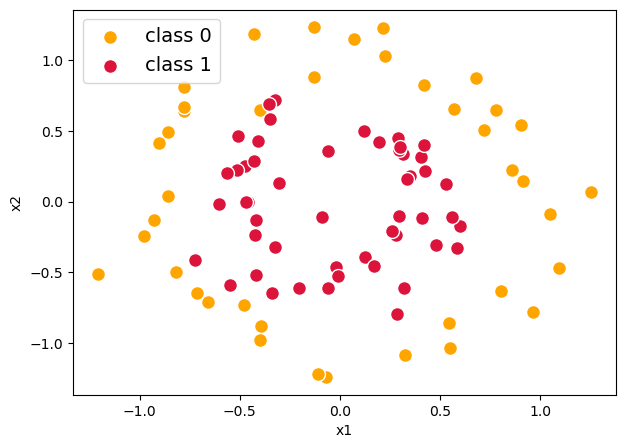

In [79]:
plt.figure(figsize=(7, 5))
plt.scatter(x[y==0, 0], x[y==0, 1], c='orange', edgecolors='w', s=100, label='class 0')
plt.scatter(x[y==1, 0], x[y==1, 1], c='crimson', edgecolors='w', s=100, label='class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(fontsize=14)
plt.show()

In [80]:
custom_gbm.fit(x, y)
sklearn_gbm.fit(x, y)

GradientBoostingClassifier(max_depth=1, n_estimators=10)

In [81]:
custom_gbm.fit(x, y)
custom_gbm_log_loss = log_loss(y, custom_gbm.predict_proba(x))
print(f"Custom GBM Log-Loss:{custom_gbm_log_loss:.15f}")

sklearn_gbm_log_loss = log_loss(y, sklearn_gbm.predict_proba(x))
print(f"Scikit-learn GBM Log-Loss:{sklearn_gbm_log_loss:.15f}")

Custom GBM Log-Loss:0.553628097599799
Scikit-learn GBM Log-Loss:0.553628097599799
